In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error

In [19]:
dataset=pd.read_csv('salary.csv')

In [20]:
print(dataset.head())

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


In [22]:
X=dataset.loc[:,'YearsExperience'].values
Y=dataset.loc[:, 'Salary'].values
dataset.isnull().sum()
#dataset.info
dataset.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


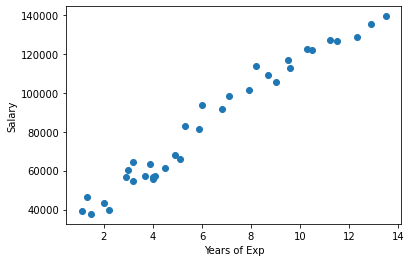

In [25]:
plt.scatter(dataset['YearsExperience'], dataset['Salary'])
plt.xlabel('Years of Exp')
plt.ylabel('Salary')
plt.show()

In [27]:
X=dataset.drop('Salary',axis=1)
Y=dataset['Salary']

In [28]:
X.shape,Y.shape

((35, 1), (35,))

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=10,test_size=0.2)
X_train.shape ,X_test.shape ,Y_train.shape ,Y_test.shape

((28, 1), (7, 1), (28,), (7,))

In [30]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [31]:
pred=model.predict(X_test)
pred

array([ 99995.22504425, 104248.57493279,  43000.33653784,  57461.72615887,
        54909.71622575,  47253.68642638,  64267.08598053])

In [32]:
Y_test

23    113812
24    109431
2      37731
7      54445
5      56642
3      43525
12     56957
Name: Salary, dtype: int64

In [33]:
differ=Y_test - pred

In [34]:
pd.DataFrame(np.c_[Y_test,pred,differ] ,columns=['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,113812.0,99995.225044,13816.774956
1,109431.0,104248.574933,5182.425067
2,37731.0,43000.336538,-5269.336538
3,54445.0,57461.726159,-3016.726159
4,56642.0,54909.716226,1732.283774
5,43525.0,47253.686426,-3728.686426
6,56957.0,64267.085981,-7310.085981


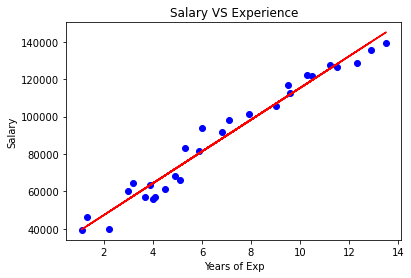

In [35]:
plt.scatter(X_train, Y_train, color='blue')
plt.plot(X_train,model.predict(X_train),color='red')
plt.title('Salary VS Experience')
plt.xlabel('Years of Exp')
plt.ylabel('Salary')
plt.show()

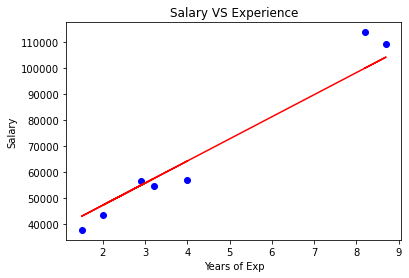

In [37]:
plt.scatter(X_test, Y_test, color='blue')
plt.plot(X_test,model.predict(X_test),color='red')
plt.title('Salary VS Experience')
plt.xlabel('Years of Exp')
plt.ylabel('Salary')
plt.show()

In [38]:
model.score(X_test,Y_test)

0.9436159807697775

In [39]:
r2=r2_score(Y_test,pred)
r2

0.9436159807697775

In [40]:
rmse=np.sqrt(mean_squared_error(Y_test,pred))
rmse

6813.522380481531

In [42]:
exp=5
model.predict([[exp]])[0]
print(f'Salary of a {exp} year experience employee is {int(model.predict([[exp]])[0])} thousands')

Salary of a 5 year experience employee is 72773 thousands
